# Time Series Analysis and Forecasting

Time series analysis examines data points collected at specific time intervals to identify patterns like trends, seasonality, and cycles within the data over time. Time series forecasting uses historical data to predict future values by modeling identified patterns and behaviors.

# Gold Price Forecasting Model

Problem Statement : Create a model to predict future gold prices using past price data. The goal is to make accurate forecasts that can help investors and others understand where gold prices might be headed.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/gold_monthly_csv.csv', parse_dates=[0])

Pandas is a Python library for data manipulation and analysis that provides easy-to-use data structures and functions for working with structured and time-series data.

About Dataset:

The dataset is taken from [kaggle](https://www.kaggle.com/datasets/nhiyen/monthly-gold-price) and they taken from world gold council [world gold council](https://www.gold.org/). This is the monthly average price in USD per troy ounce (One troy ounce is equal to 31.1035 grams).

The data is from January 1950 to July 2020 with 847 rows and price as one column.

In [ ]:
# To get the first 5 rows
df.head()

,Date,Price
0,1950-01-01,34.73
1,1950-02-01,34.73
2,1950-03-01,34.73
3,1950-04-01,34.73
4,1950-05-01,34.73


In [ ]:
df['Date'] = df['Date'] + pd.offsets.MonthEnd(0)

By default pandas consider the date column ( if not mentioned ) from starting date as 01. Since the mean is calculated end of month, so we used pandas offset to make this correction.

In [ ]:
# Save this cleaned data for furter modelling
df.to_csv('cleaned_gold_price.csv', index=False)

In [ ]:
df.head(1)

,Date,Price
0,1950-01-31,34.73


In [ ]:
df.tail(1)

,Date,Price
846,2020-07-31,1840.807


In [ ]:
# To know about the rows and column in the dataset
df.shape

(847, 2)

This dataset has 847 rows and 2 column

## Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    847 non-null    datetime64[ns]
 1   Price   847 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.4 KB


The `Date` column is in datetime datatype and Price column is in float format. Hence we can proceed further.

In [ ]:
# Five Number summary
df['Price'].describe()

count     847.000000
mean      416.556906
std       453.665313
min        34.490000
25%        35.190000
50%       319.622000
75%       447.029000
max      1840.807000
Name: Price, dtype: float64

<Axes: ylabel='Price'>

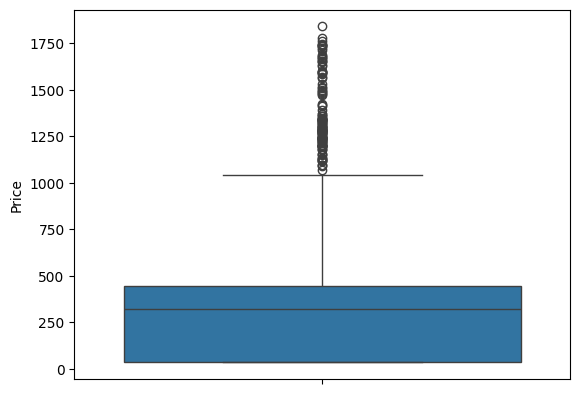

In [ ]:
sns.boxplot(df.Price)

Inference:
We only include `Price` column for statistical summary not included the date column. All Price values in USD $.

- The dataset comprises 847 entries, covering the period from January 1950 to July 2020.
- It includes two columns: 'Date' and 'Price', representing the date of observation and the corresponding gold price, respectively.
- Gold prices exhibit variability, ranging from a minimum value of 34.49 to a maximum value of 1840.81.
- The mean gold price across the dataset is 416.56, indicating the average price observed over the given period.
- The standard deviation of 453.67 suggests significant variability around the mean, highlighting fluctuations in gold prices.
- The median price, at 319.62, implies a potential right-skewed distribution, indicating that higher-priced outliers may influence the mean.

## To treat null values

In [ ]:
# TREATING MISSING VALUES:
from sklearn.impute import SimpleImputer
def treat_missing_values(df, strategy="mean", fill_value=None, categorical_columns=None, numerical_columns =None):
    """
    Treats missing values in a DataFrame using specified strategies for numerical and categorical data.

    Usage:
    treated_df = treat_missing_values(your_dataframe, strategy='median', fill_value='missing', categorical_columns=['col1', 'col2'])
    """
    df_filled = df.copy()

    if df_filled.isna().values.sum() == 0:
      print('No null values')
      return df_filled
    else:
      # Separate columns into categorical and numerical based on user input or data type
      if categorical_columns is None and numerical_columns is None:
          categorical_columns = df_filled.select_dtypes(include=['object', 'category']).columns.tolist()
          # print(categorical_columns)
          numerical_columns = df_filled.select_dtypes(include=['number']).columns.tolist()
          # print(numerical_columns)

      # Treat numerical columns
      if strategy in ['mean', 'median', 'most_frequent']:
          num_imputer = SimpleImputer(strategy=strategy)
          df_filled[numerical_columns] = num_imputer.fit_transform(df_filled[numerical_columns])
      elif strategy == 'constant' and fill_value is not None:
          num_imputer = SimpleImputer(strategy=strategy, fill_value=fill_value)
          df_filled[numerical_columns] = num_imputer.fit_transform(df_filled[numerical_columns])

      # Treat categorical columns
      if 'constant' == strategy and fill_value is not None:
          for column in categorical_columns:
              df_filled[column].fillna(fill_value, inplace=True)
      else:
          # Default to most frequent for categorical if not using constant or if no fill_value is provided for constant strategy
          cat_imputer = SimpleImputer(strategy='most_frequent')
          df_filled[categorical_columns] = cat_imputer.fit_transform(df_filled[categorical_columns])

      return df_filled

In [ ]:
treat_missing_values(df)

No null values


,Date,Price
0,1950-01-31,34.730
1,1950-02-28,34.730
2,1950-03-31,34.730
3,1950-04-30,34.730
4,1950-05-31,34.730
...,...,...
842,2020-03-31,1593.764
843,2020-04-30,1680.030
844,2020-05-31,1715.697
845,2020-06-30,1734.032


In [ ]:
# Checking for null values
print(f'Dataset has {df.isna().values.sum()} null values')

Dataset has 0 null values


Since there is no null values in our dataframe we can move further for our analysis.

## Data Visualisation

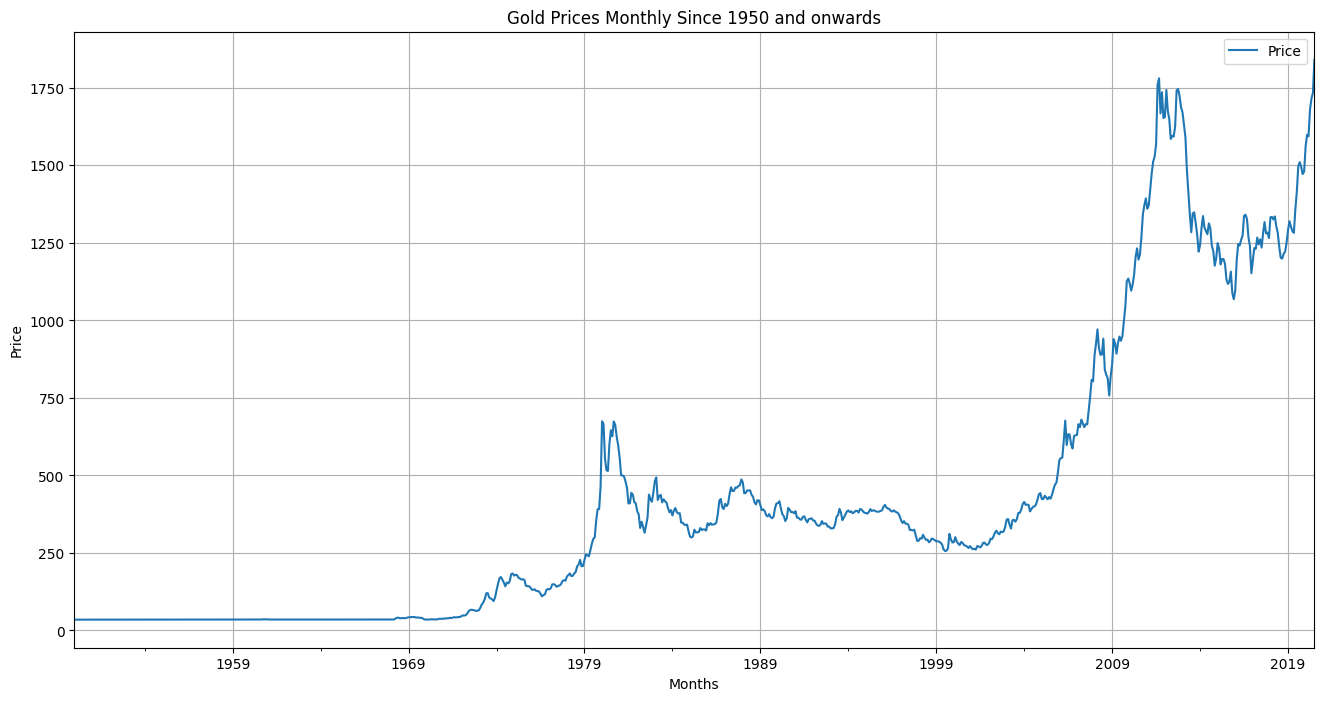

In [ ]:
# Line chart of price from 1950
df.set_index('Date').plot(figsize=(16, 8))
plt.title('Gold Prices Monthly Since 1950 and onwards')
plt.xlabel('Months')
plt.ylabel('Price')
plt.grid()

Inference:

Analysing and connecting dots with economy, geopolitical situations to know the context.

The above line graph shows a upward trend. The exponential trend was started during 2005 onwards.

Gold price was stable till 1970 later it start to increase. In 1980-82 gold price rised exponentially.

- In the initial phase, there was no fluctuation in data, due to awarness, documentation etc.

- During the early 1980s, the global economy experienced significant volatility and uncertainty, including high inflation rates, Geo political tension and recessionary pressures. Investors often turn to gold as a safe-haven asset during times of economic instability

The relative stability in gold prices from the mid-1980s to the early 2000s might be due to,

- experienced a prolonged period of relatively stable economic growth, low inflation rates, controlled monetary policy and increased international trade.

After 2008-09 the price rised exponentially due to financial crisis, currency devaluation, low interest rates, supply constraints.

In total the price of gold is not only depend on its availability but also depend on economic conditions, market sentiment, geopolitical factors.



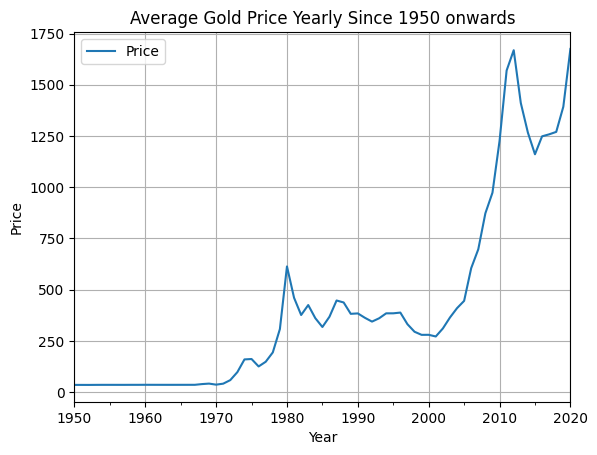

In [ ]:
df_yearly_sum = df.resample('A', on='Date').mean()
df_yearly_sum.plot()
plt.title('Average Gold Price Yearly Since 1950 onwards')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

Inference:

The average yearly plot provides a smoother trend over time, highlighting the long-term behavior and changes in gold prices, while the previous plot may have exhibited more short-term fluctuations and seasonality.

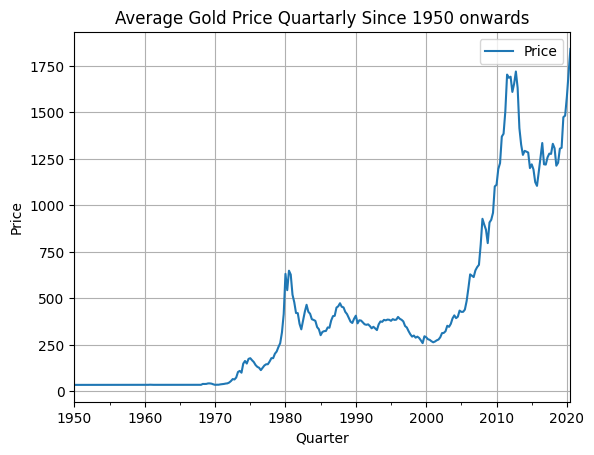

In [ ]:
df_quarterly_sum = df.resample('Q', on='Date').mean()
df_quarterly_sum.plot()
plt.title('Average Gold Price Quartarly Since 1950 onwards')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid()
plt.show()

Compared to the previous plots (monthly or yearly averages), the quarterly plot provides an intermediary view of the gold price trend. It smooths out some of the short-term fluctuations seen in the monthly plot while still capturing more detail than the yearly plot. This quarterly view helps identify trends and patterns that may occur over a few months' span, providing a balance between short-term and long-term insights.

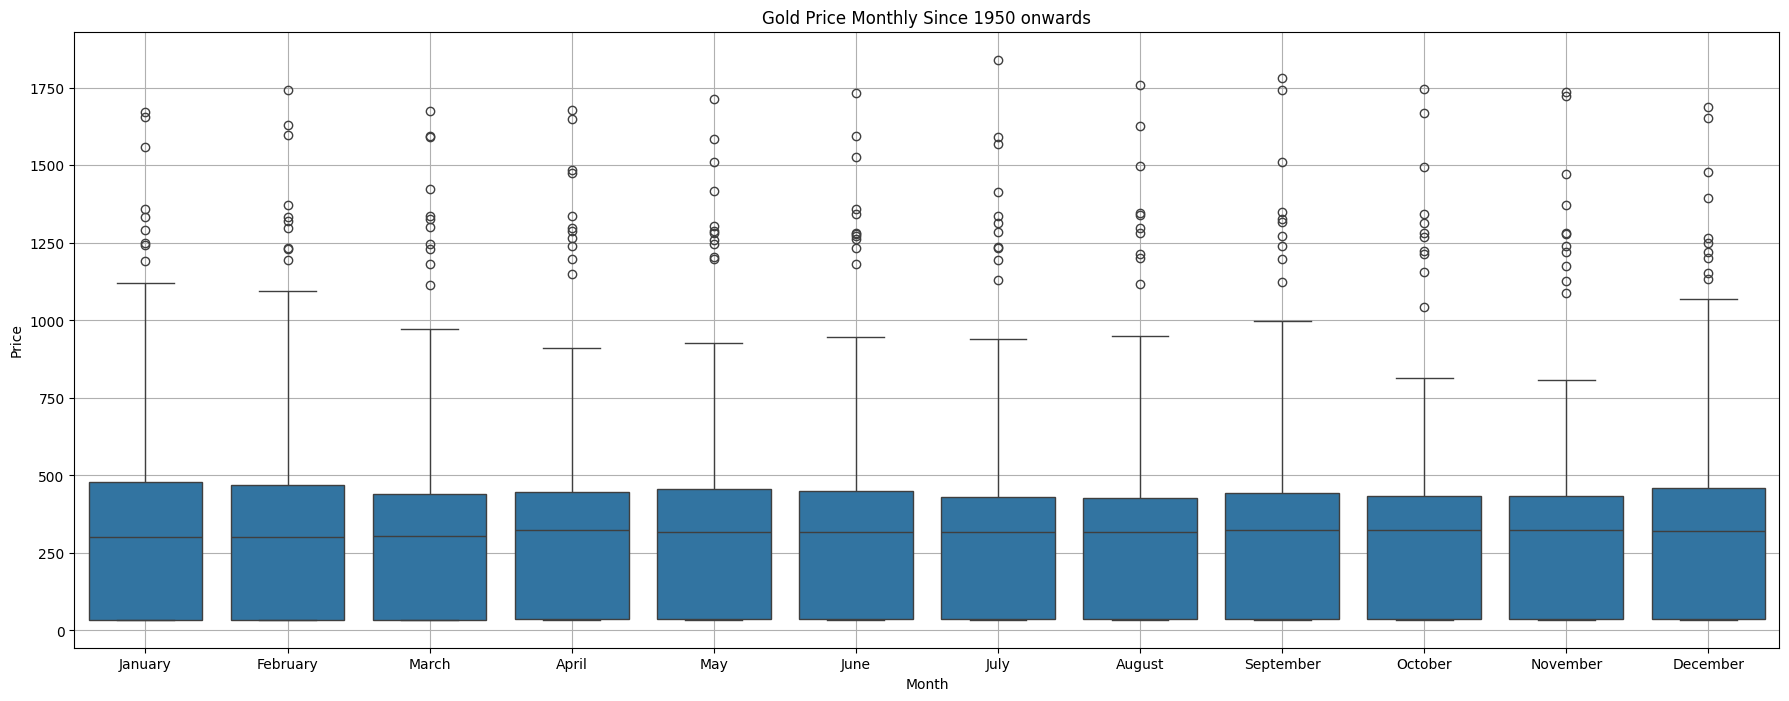

In [ ]:
_, ax= plt.subplots(figsize=(22, 8))
sns.boxplot(x=df.Date.dt.month_name(), y=df.Price.values, ax=ax)
plt.title('Gold Price Monthly Since 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()

Inference:

Box plot is used to visualize distribution and outliers. From the above plot, we can see:

- The median gold price is relatively stable across the months.

- Each month has several outliers, suggesting that external factors periodically cause significant price deviations.

The coefficient of variation helps assess the relative variability of gold prices, providing insights into the consistency or volatility of price movements across different years.

In [ ]:
def coeff_of_variance(data, date_col, var_col):
  df = data.copy()
  # print(df.head())
  df[date_col] = pd.to_datetime(df[date_col])
  df_1 = df.groupby(by=df[date_col].dt.year).mean().rename(columns={'Price':'Mean'})
  # print(df_1.head())
  df_1 = df_1.merge(df.groupby(df[date_col].dt.year).std().rename(columns = {'Price':'Std'}), left_index=True, right_index=True)
  df_1['coeff_of_variance'] = ((df_1.Std/ df_1.Mean)*100)
  return df_1[['Mean', 'Std','coeff_of_variance']].sort_values('coeff_of_variance', ascending=False).round(2)

In [ ]:
cov = coeff_of_variance(df, 'Date', 'Price')
cov

,Mean,Std,coeff_of_variance
Date,,,
1979,307.30,75.87,24.69
1973,97.12,16.69,17.18
1972,58.10,8.25,14.20
1982,375.91,44.90,11.94
2013,1410.80,149.66,10.61
...,...,...,...
1965,35.13,0.02,0.06
1964,35.09,0.01,0.04
1963,35.08,0.01,0.03


Inference:

- Years with higher coefficient of variance (e.g., 1979, 1982, 2013), indicats greater variability or fluctuations in gold prices which leads to lower predictability, higher valatility.

- Years with lower coefficient of variance (e.g., 1963, 1964, 1965), suggesting relatively stable gold prices during those periods.


## To detect outlier

In [ ]:
def preprocess_features(df, threshold_skew=0.5, outlier_method='IQR'):
    """
    Preprocesses the dataset by normalizing numerical features and handling outliers. Outliers are capped to the
    95th percentile for upper outliers and the 5th percentile for lower outliers.

    Usage:
    preprocessed_df = preprocess_features(your_dataframe)
    """
    df_transformed = df.copy()
    numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

    # Normalization and outlier treatment for each numerical column
    for col in numerical_columns:
        # Handling outliers
        if outlier_method == 'IQR':
            # Calculate the bounds to detect outliers
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Calculate the values to cap outliers
            lower_cap = df[col].quantile(0.05)
            upper_cap = df[col].quantile(0.95)
            print(f'Lower fence: {lower_cap}')
            print(f'Higher fence: {upper_cap}')

            # Cap outliers
            df_transformed[col] = np.where(df_transformed[col] > upper_bound, upper_cap, df_transformed[col])
            df_transformed[col] = np.where(df_transformed[col] < lower_bound, lower_cap, df_transformed[col])

    return df_transformed


In [ ]:
preprocess_features(df)

Lower fence: 34.88
Higher fence: 1368.0615999999993


,Date,Price
0,1950-01-31,34.7300
1,1950-02-28,34.7300
2,1950-03-31,34.7300
3,1950-04-30,34.7300
4,1950-05-31,34.7300
...,...,...
842,2020-03-31,1368.0616
843,2020-04-30,1368.0616
844,2020-05-31,1368.0616
845,2020-06-30,1368.0616


Using IQR, we can get the upper and lower boundary to take the data into consideration.

Lower fence: 34.88
Higher fence: 1368.0615999999993


<Axes: xlabel='Date'>

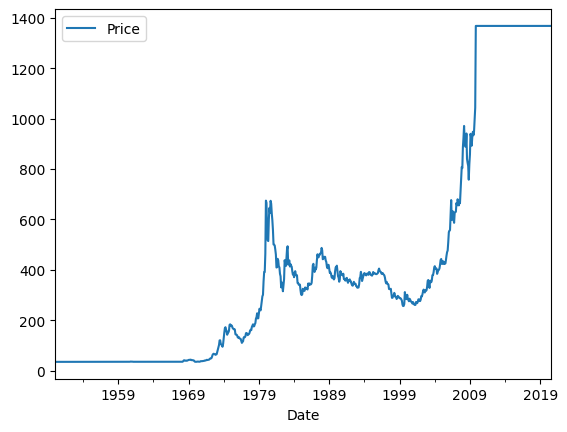

In [ ]:
preprocess_features(df).plot('Date', 'Price')

By seeing above graph we can infer that, using IQR method it is not suitable for this problem. We can try with transformation, or limiting the dataset from 1975 to 2020 for our analysis.

## Log transformation on price and comparision

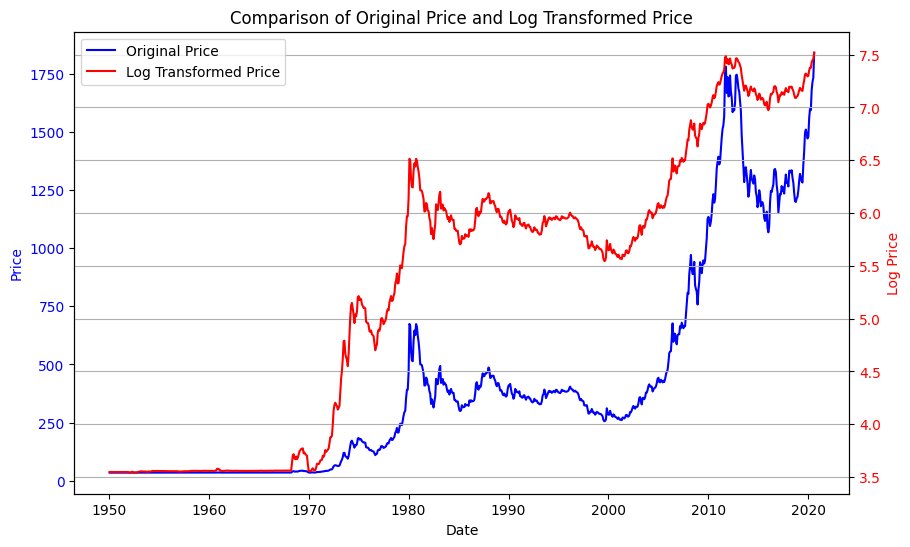

In [ ]:
dt = df.copy()
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original price on the left y-axis
ax.plot(dt['Date'], dt['Price'], label='Original Price', color='blue')
ax.set_ylabel('Price', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for log-transformed price
ax2 = ax.twinx()
ax2.plot(dt['Date'], np.log(dt['Price']), label='Log Transformed Price', color='red')
ax2.set_ylabel('Log Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set common x-axis label
ax.set_xlabel('Date')

# Add legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Comparison of Original Price and Log Transformed Price')

plt.grid(True)
plt.show()


Original Price Trend (Blue Line):

- The original price data shows significant volatility, especially during economic crises and market upheavals. This is evident from the sharp spikes and dips in the plot.

Log Transformed Price Trend (Red Line):

- The log transformation smooths out the data, making the time series more linear.

Log transformation will benefit in variance stabilization, linearization of exponential growth and reducing skewness.

## Dickey Fuller Test (DFT) to check stationarity

The Dickey-Fuller test checks if a time series is stationary, meaning its properties like mean and variance are constant over time. It helps identify trends or seasonality in the data. If the test shows the series is non-stationary, it means the data has trends or patterns, which must be addressed for accurate modeling.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF test stats', 'p value', 'lags used', 'number of observation']
  for value, label in zip(result, labels):
    print(label + ': ' + str(value))
  if result[1] <= 0.05:
    print('strong evidence against null hypothesis, reject null hypothesis. Data has no root and is stationary')
  else:
    print('weekly evidence against null hypothesis, time series has no unit root, indicating it is non-stationary')

In [ ]:
adfuller_test(df.Price)

ADF test stats: 0.8143240077835248
p value: 0.9918639010465631
lags used: 11
number of observation: 835
weekly evidence against null hypothesis, time series has no unit root, indicating it is non-stationary


In [ ]:
# Differencing once
adfuller_test(df.Price.diff(1).dropna())

ADF test stats: -6.217086926407336
p value: 5.33328251334224e-08
lags used: 10
number of observation: 835
strong evidence against null hypothesis, reject null hypothesis. Data has no root and is stationary


Inference:

The current price feature has trend. Upon differencing once ( d = 1 ), the trending pattern removed and can be used for further modelling.

## Time series decompose

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
# Decomposition can be off two types (Additive, Multiplicative) and the following function implements Seasonal_decompose and STL
# STL is more inclusive the data does not have a repeated periodicity and seasonal_decompose is when we observe repeated seasonal movements
def decompose_time_series(series, method='STL', period=1, model='additive', **kwargs):
    """
    Decompose a time series using specified method (STL, seasonal_decompose).

    Parameters:
    - series: pd.Series, the time series to decompose.
    - method: str, the decomposition method ('STL', 'seasonal_decompose', 'MSTL').
    - period: int, the seasonality period of the time series.
    - model: str, the type of decomposition model ('additive' or 'multiplicative').
    - kwargs: additional keyword arguments for the decomposition method.

    Returns:
    A decomposition result depending on the method chosen.
    """

    if method == 'STL':
        stl = STL(series, period=period, **kwargs)
        result = stl.fit()

    elif method == 'seasonal_decompose':
        result = seasonal_decompose(series, model=model, period=period, **kwargs).plot()

    elif method == 'MSTL':
        # Placeholder for MSTL decomposition
        # This would require an implementation or a library that supports MSTL
        result = None
        print("MSTL decomposition is not directly supported. Please implement or use an appropriate library.")

    else:
        raise ValueError("Unsupported decomposition method specified.")

    return result

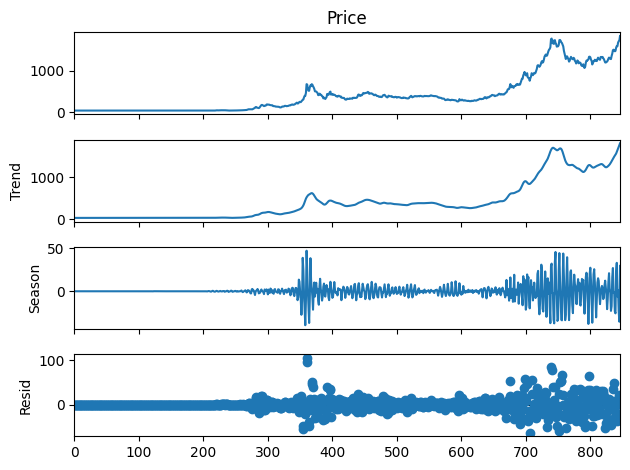

In [ ]:
decompose_time_series(df.Price, method='STL', period=6, model='multiplicative').plot();

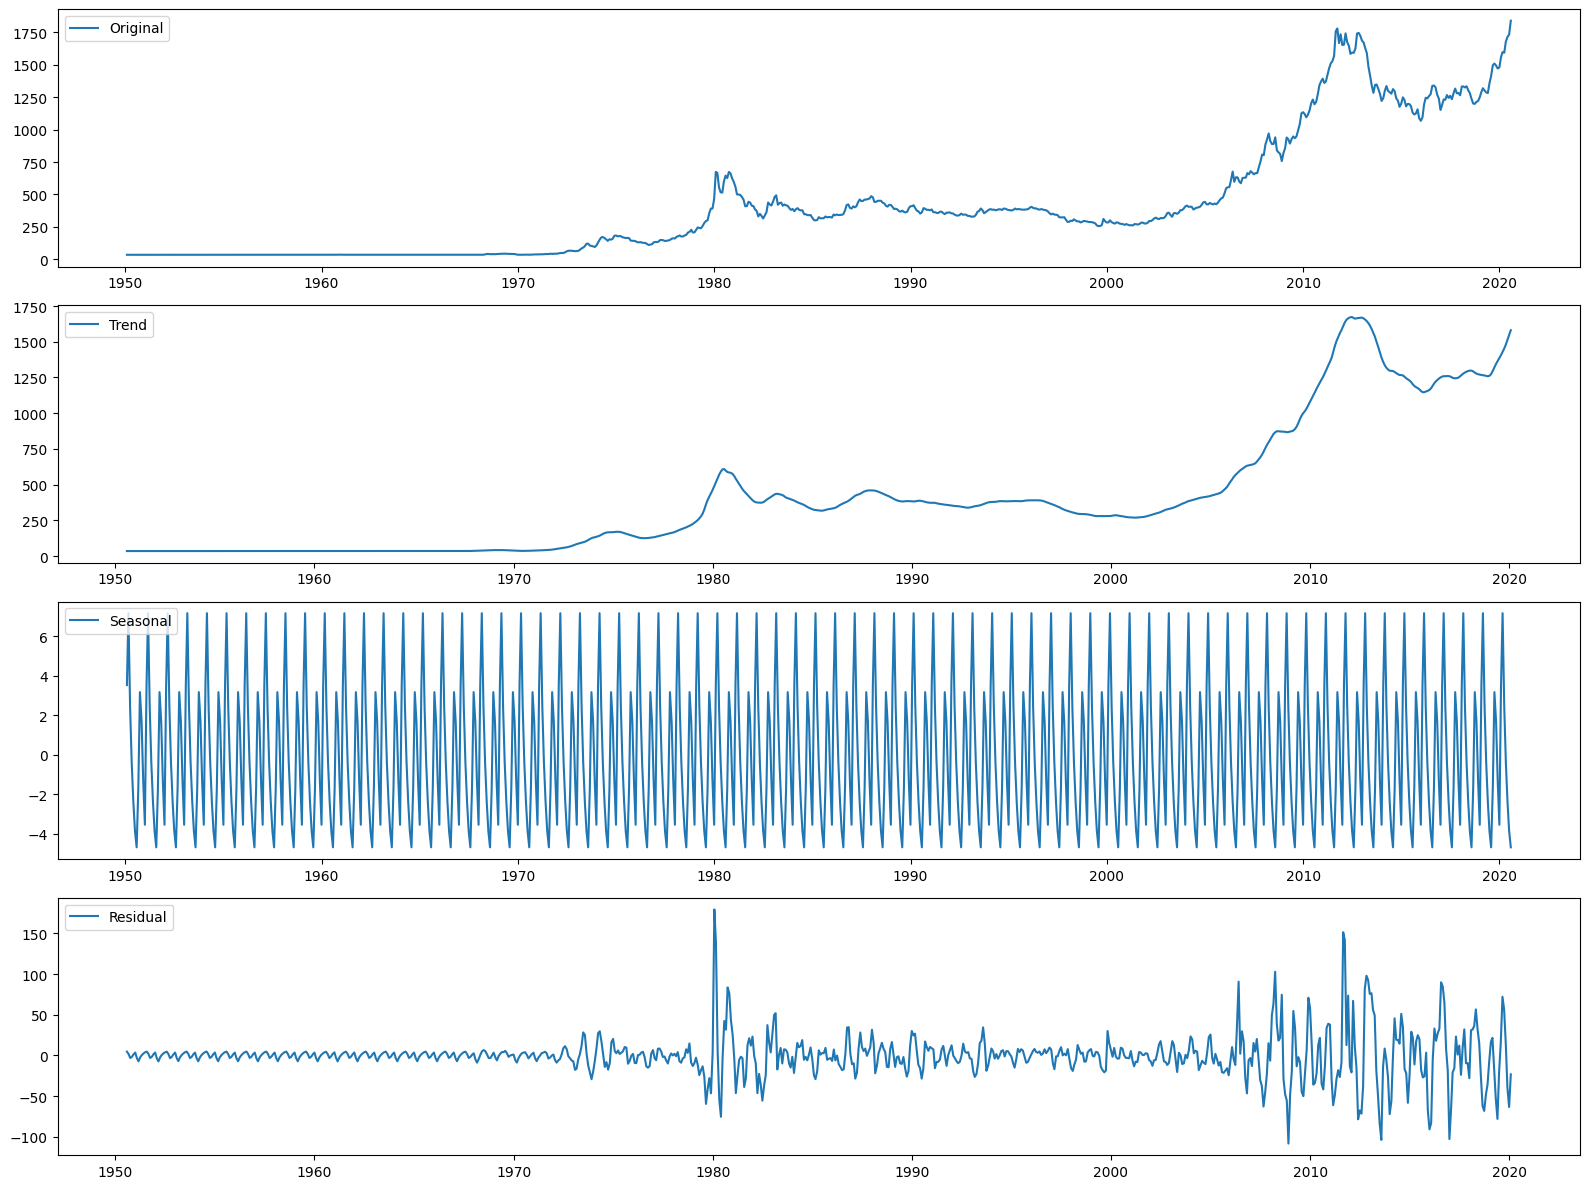

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df_s is your DataFrame with a 'Date' index and a 'Price' column
# Perform seasonal decomposition
df_s = df.copy()
df_s.Date = pd.to_datetime(df.Date)
df_s.set_index('Date', inplace=True)
decomposition = seasonal_decompose(df_s['Price'])

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 12))

# Original time series
ax1.plot(df_s.index, df_s['Price'], label='Original')
ax1.legend(loc='upper left')

# Trend component
ax2.plot(decomposition.trend.index, decomposition.trend, label='Trend')
ax2.legend(loc='upper left')

# Seasonal component
ax3.plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonal')
ax3.legend(loc='upper left')

# Residual component
ax4.plot(decomposition.resid.index, decomposition.resid, label='Residual')
ax4.legend(loc='upper left')

plt.tight_layout()
plt.show()


Inference:

- **Upward Trending:**

There is a clear upward trend, particularly noticeable in two phases: from the early 1970s to 1980 and from the early 2000s to 2012. Since the rate of change of trend is not constant, so we use multiplicative model for trend.

For detrending First-order differencing is sufficient ( d = 1 )

- **Yearly Seasonality:**

The seasonal pattern is very regular and consistent over time, with a clear repetitive cycle every year ( s = 12 ).

The amplitude of the seasonal component appears constant, suggesting a additive rather than multiplicative.

- **Residuals :**

The residuals show increased volatility post-1980, particularly during the spikes around 1980 and 2010.

There are still some patterns and spikes in the residuals, indicating potential events or shocks not captured by the trend and seasonal components.


These insights highlight the overall trend, seasonal patterns, and randomness in the data, aiding in comprehensive analysis and forecasting.

<Axes: xlabel='Date'>

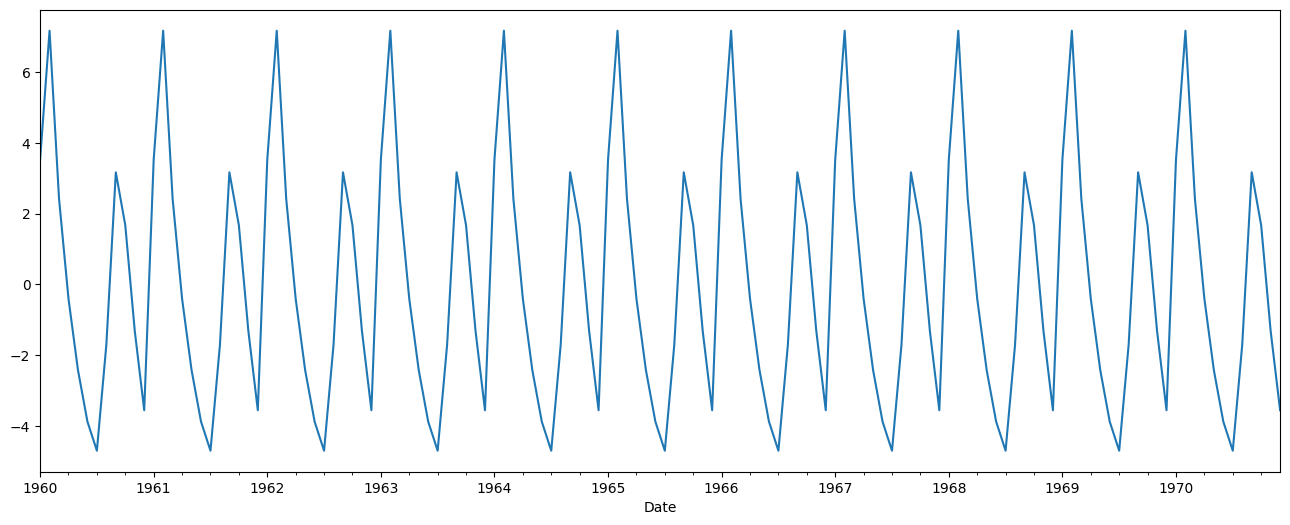

In [ ]:
# To zoom in the seasonal component
result = seasonal_decompose(df_s.Price)
seasonal_component = result.seasonal
seasonal_component['1960':'1970'].plot(figsize=(16, 6))


From above graph it is evident that yearly seasonality is present.

## Nasdaq data correlation

In [ ]:
stock_data_ndx = pd.read_csv('/content/nasdaq history.csv')

The Nasdaq data is downloaded from [Nasdaq](https://www.nasdaq.com/nasdaq-data-link). Its has daily data from 2014-05-31 to 2024-05-15. It has 2531 rows and 5 columns.

In [ ]:
stock_data_ndx.shape

(2531, 5)

In [ ]:
stock_data_ndx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2531 non-null   object 
 1   Close/Last  2531 non-null   float64
 2   Open        2531 non-null   float64
 3   High        2531 non-null   float64
 4   Low         2531 non-null   float64
dtypes: float64(4), object(1)
memory usage: 99.0+ KB


In [ ]:
stock_data_ndx.Date = pd.to_datetime(stock_data_ndx.Date)

In [ ]:
stock_data_ndx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2531 non-null   datetime64[ns]
 1   Close/Last  2531 non-null   float64       
 2   Open        2531 non-null   float64       
 3   High        2531 non-null   float64       
 4   Low         2531 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 99.0 KB


In [ ]:
stock_data_ndx = stock_data_ndx[['Date', 'Close/Last']].rename(columns = {'Close/Last':'Close'})

In [ ]:
stock_data_ndx.head()

,Date,Close
0,2024-05-15,18596.65
1,2024-05-14,18322.77
2,2024-05-13,18198.61
3,2024-05-10,18161.18
4,2024-05-09,18113.46


In [ ]:
stock_data_ndx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2531 non-null   datetime64[ns]
 1   Close   2531 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.7 KB


<Axes: xlabel='Date'>

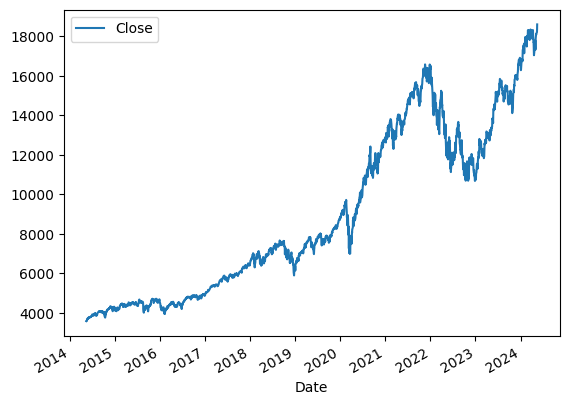

In [ ]:
stock_data_ndx.plot('Date', 'Close')

In [ ]:
# Resampling the data from daily to monthly
stock_data_ndx_monthly = stock_data_ndx.resample('M', on='Date').mean().reset_index()

In [ ]:
stock_data_ndx_monthly.head(2)

,Date,Close
0,2014-05-31,3668.374545
1,2014-06-30,3792.107143


In [ ]:
stock_data_ndx_monthly.head()

,Date,Close
0,2014-05-31,3668.374545
1,2014-06-30,3792.107143
2,2014-07-31,3926.574348
3,2014-08-31,3979.402381
4,2014-09-30,4070.851818


In [ ]:
stock_data_ndx_monthly.shape

(121, 2)

In [ ]:
temp_gold_df = df[df.Date >= '2014-05-31']

In [ ]:
temp_gold_df.shape

(75, 2)

In [ ]:
stock_data_ndx_monthly = stock_data_ndx_monthly[stock_data_ndx_monthly.Date <= temp_gold_df.tail(1).Date.values[0]]

In [ ]:
stock_data_ndx_monthly.head(3)

,Date,Close
0,2014-05-31,3668.374545
1,2014-06-30,3792.107143
2,2014-07-31,3926.574348


In [ ]:
temp_gold_df.tail(3)

,Date,Price
844,2020-05-31,1715.697
845,2020-06-30,1734.032
846,2020-07-31,1840.807


In [ ]:
temp_gold_df_nasdaq = temp_gold_df[temp_gold_df.Date >= stock_data_ndx_monthly.Date.values[0]]

In [ ]:
temp_gold_df_nasdaq.shape, stock_data_ndx_monthly.shape

((75, 2), (75, 2))

In [ ]:
temp_gold_df_nasdaq.head(1), stock_data_ndx_monthly.head(1)

(          Date     Price
 772 2014-05-31  1288.913,
         Date        Close
 0 2014-05-31  3668.374545)

In [ ]:
stock_data_ndx_monthly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    75 non-null     datetime64[ns]
 1   Close   75 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [ ]:
temp_gold_df_nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 772 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    75 non-null     datetime64[ns]
 1   Price   75 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [ ]:
np.corrcoef(temp_gold_df_nasdaq.Price.values, stock_data_ndx_monthly.Close.values)[0,1]

0.780584806391229

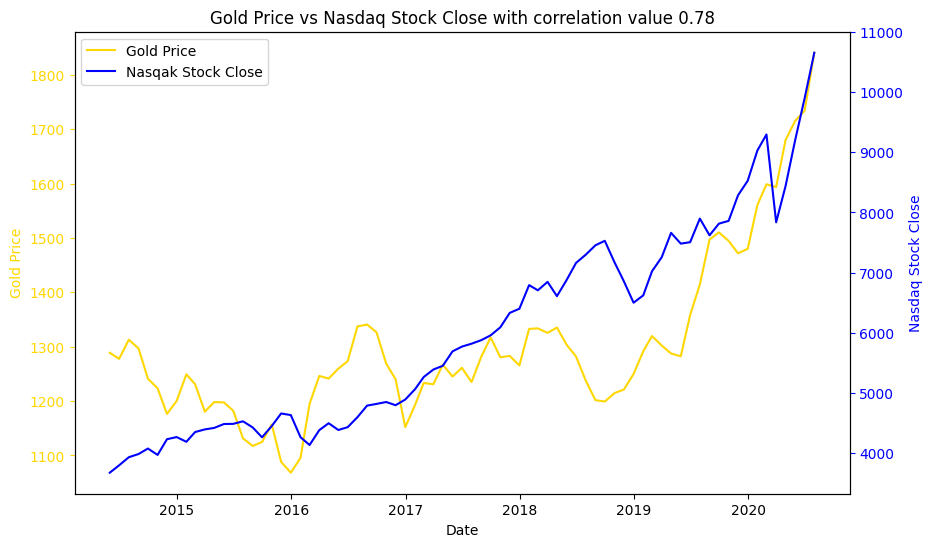

In [ ]:
# Merging both DataFrames on 'Date'
merged_df = pd.merge(temp_gold_df_nasdaq, stock_data_ndx_monthly, on='Date', how='inner')

# Creating a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting gold price on the first y-axis
ax1.plot(merged_df['Date'], merged_df['Price'], label='Gold Price', color='gold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price', color='gold')
ax1.tick_params('y', colors='gold')

# Creating a second y-axis
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['Close'], label='Nasqak Stock Close', color='blue')
ax2.set_ylabel('Nasdaq Stock Close', color='blue')
ax2.tick_params('y', colors='blue')

# Adding legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title(f'Gold Price vs Nasdaq Stock Close with correlation value {round(np.corrcoef(temp_gold_df_nasdaq.Price.values, stock_data_ndx_monthly.Close.values)[0,1], 2)}')
plt.show()

Inference:

Gold prices and Nasdaq stock close have a positive correlation of 0.78, indicating they generally move in the same direction.

Now lets check the correlation with gold price and nasdaq stock price with lag1 value ie impact last month stock price with gold price

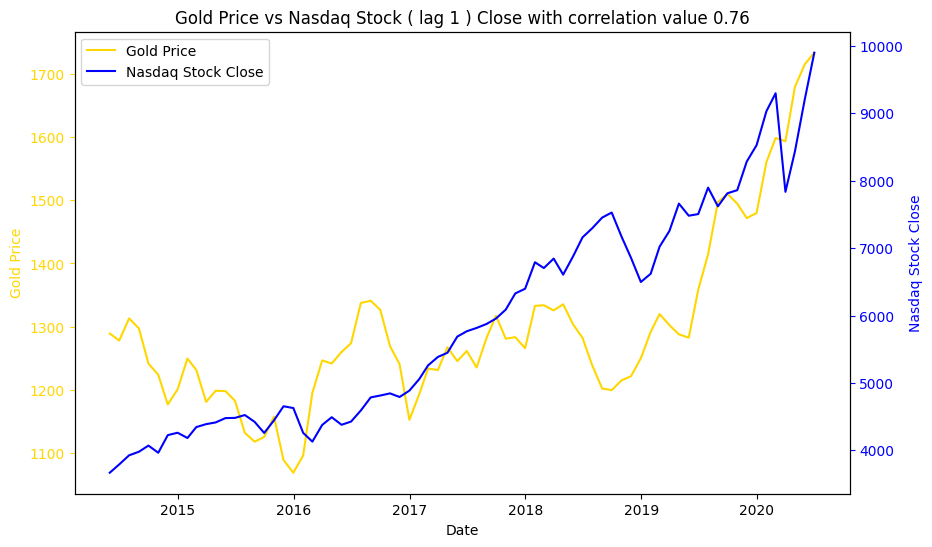

In [ ]:
# Merging both DataFrames on 'Date'
merged_df_nasdaq = pd.merge(temp_gold_df_nasdaq, stock_data_ndx_monthly.shift(1), on='Date', how='inner')
merged_df_nasdaq.dropna(inplace=True)
# Creating a figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting gold price on the first y-axis
ax1.plot(merged_df_nasdaq['Date'], merged_df_nasdaq['Price'], label='Gold Price', color='gold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price', color='gold')
ax1.tick_params('y', colors='gold')

# Creating a second y-axis
ax2 = ax1.twinx()
ax2.plot(merged_df_nasdaq['Date'], merged_df_nasdaq['Close'], label='Nasdaq Stock Close', color='blue')
ax2.set_ylabel('Nasdaq Stock Close', color='blue')
ax2.tick_params('y', colors='blue')

# Adding legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title(f'Gold Price vs Nasdaq Stock ( lag 1 ) Close with correlation value {round(np.corrcoef(temp_gold_df_nasdaq.Price[1:].values, stock_data_ndx_monthly.Close.shift(1).dropna().values)[0,1], 2)}')
plt.show()


*  Though there is a positive correlation,stock prices depends on many external factors like economic growth, inflation rates etc.

* There was a positive economic growth during 2014 till 2020 in USA https://en.wikipedia.org/wiki/Economy_of_the_United_States. Since the GDP growth was increasing, inflation rate was less than 2.5% and other indicators was positive, we can partially say that the gold price and stock price have positive correlation.

In [ ]:
# to find the correlation with gold price and Nasdaq stock lagged price
for i in range(1, 7):
    lagged_df = merged_df.copy()
    lagged_df['Close'] = lagged_df['Close'].shift(i)
    lagged_df.dropna(inplace=True)
    correlation = np.corrcoef(lagged_df['Price'].values, lagged_df['Close'].values).round(3)[0, 1]
    print(f"The correlation with NASDAQ stock price (lag {i}) and gold price is {correlation}")

The correlation with NASDAQ stock price (lag 1) and gold price is 0.759
The correlation with NASDAQ stock price (lag 2) and gold price is 0.75
The correlation with NASDAQ stock price (lag 3) and gold price is 0.755
The correlation with NASDAQ stock price (lag 4) and gold price is 0.764
The correlation with NASDAQ stock price (lag 5) and gold price is 0.783
The correlation with NASDAQ stock price (lag 6) and gold price is 0.766


Inference:

From above correlation, it is evident that there is positive correlation but the correlation values varies over its lagged values.

## Gold Price and `Gold Price` word search over Google search engine

In [ ]:
df_search_trend = pd.read_csv('/content/multiTimeline.csv', names = ['Search'], header=0)

The above data is from [Google Trend](https://trends.google.com/trends/). Number of times word `Gold Price` is searched in search engine, Google will give a value between 1 - 100. This helps for our analysis. It starts from 2004-12 till 2020-03-31 with 189 rows and 1 column.

In [ ]:
df_search_trend.shape

(189, 1)

In [ ]:
df_search_trend.head()

,Search
Month,Gold price: (Worldwide)
2004-12,10
2005-01,9
2005-02,6
2005-03,6


In [ ]:
# Data preparation for analysis
df_search_trend.drop('Month', axis=0, inplace=True)

In [ ]:
df_search_trend.reset_index(inplace=True)

In [ ]:
df_search_trend.columns = ['Date', 'Search']

In [ ]:
df_search_trend['Date'] = pd.to_datetime(df_search_trend.Date)

In [ ]:
df_search_trend.Date = df_search_trend.Date + pd.offsets.MonthEnd(0)

In [ ]:
df_search_trend.head()

,Date,Search
0,2004-12-31,10
1,2005-01-31,9
2,2005-02-28,6
3,2005-03-31,6
4,2005-04-30,6


In [ ]:
df_search_trend.Search = pd.to_numeric(df_search_trend.Search)

In [ ]:
df_search_trend.sort_values('Search')

,Date,Search
5,2005-05-31,5
2,2005-02-28,6
3,2005-03-31,6
4,2005-04-30,6
30,2007-06-30,6
...,...,...
182,2020-02-29,60
80,2011-08-31,66
187,2020-07-31,66
184,2020-04-30,71


In [ ]:
df_search_trend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    188 non-null    datetime64[ns]
 1   Search  188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.1 KB


<Axes: xlabel='Date'>

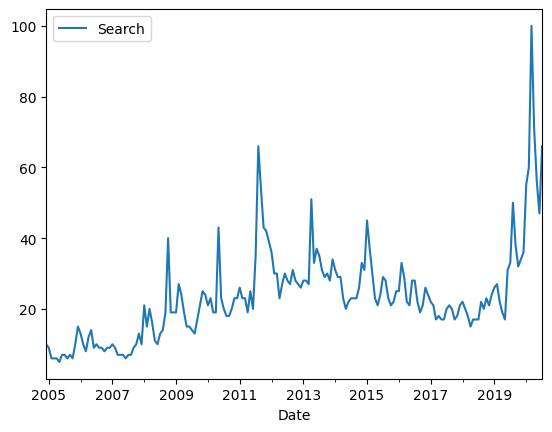

In [ ]:
df_search_trend.plot('Date', 'Search')

The above plot it is evident that near to 2010 ( initial years of 3rd phase ) the gold price search increased and towards 2020, search is significantly increased. Now we analyse with gold price and stock price.

In [ ]:
merged_df = pd.merge(temp_gold_df, stock_data_ndx_monthly , on='Date')
merged_df = pd.merge(merged_df, df_search_trend, on='Date')

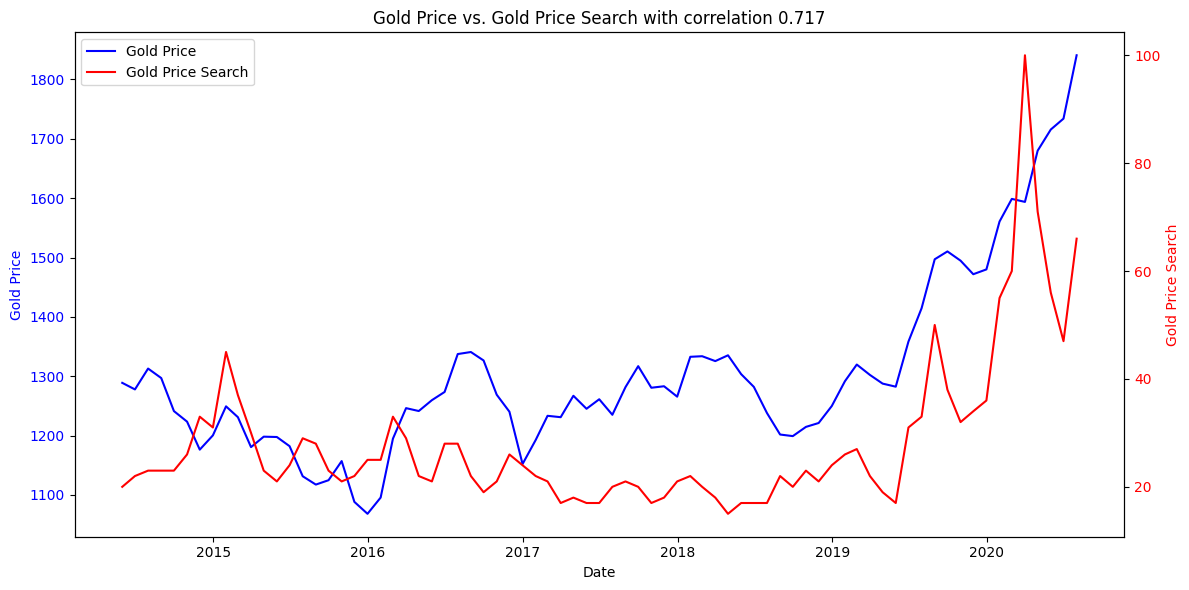

In [ ]:
# plot the gold price and nasdaq stock price
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a second y-axis for gold price search
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['Search'], color='red', label='Gold Price Search')
ax2.set_ylabel('Gold Price Search', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Plot gold price on left y-axis
ax1.plot(merged_df['Date'], merged_df['Price'], color='blue', label='Gold Price')
ax1.set_ylabel('Gold Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set x-axis label and title
ax1.set_xlabel('Date')
correlation_gold_price_search = np.corrcoef(merged_df.Price.values, merged_df.Search.values).round(3)[0,1]
plt.title(f'Gold Price vs. Gold Price Search with correlation {correlation_gold_price_search}')

# Show legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()



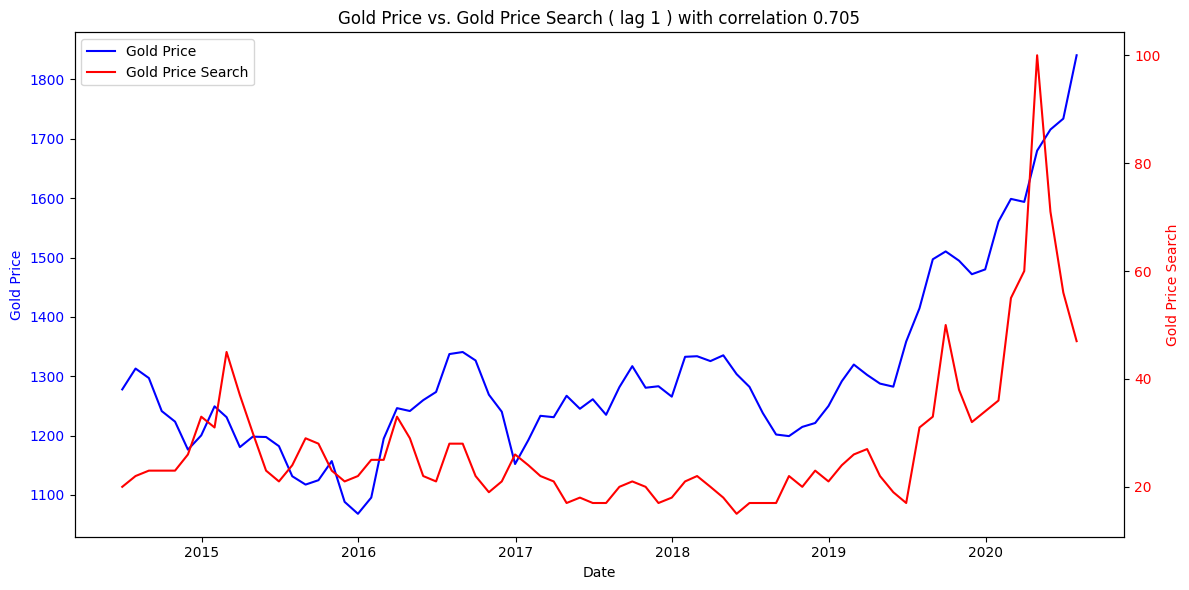

In [ ]:
# plot the gold price and nasdaq stock price
fig, ax1 = plt.subplots(figsize=(12, 6))
merged_dff = merged_df.copy()
merged_dff.Search = merged_dff.Search.shift(1)
merged_dff.dropna(inplace=True)

# Create a second y-axis for gold price search
ax2 = ax1.twinx()
ax2.plot(merged_dff['Date'], merged_dff['Search'], color='red', label='Gold Price Search')
ax2.set_ylabel('Gold Price Search', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Plot gold price on left y-axis
ax1.plot(merged_dff['Date'], merged_dff['Price'], color='blue', label='Gold Price')
ax1.set_ylabel('Gold Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set x-axis label and title
ax1.set_xlabel('Date')
correlation_gold_price_search = np.corrcoef(merged_dff.Price.values, merged_dff.Search.values).round(3)[0,1]
plt.title(f'Gold Price vs. Gold Price Search ( lag 1 ) with correlation {correlation_gold_price_search}')

# Show legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()



Inference:

1. **Upward Trends**: Both gold prices and search volumes increased over time from 2015 to 2020.

2. **Correlation**: There is a positive correlation (0.716577) between gold price and search volume, suggesting that public interest closely follows actual gold value.

3. **Investor Behavior**: Monitoring search volume can provide insights into market sentiment and investor behavior related to gold.

In [ ]:
# to find the correlation with gold price and gold price word search with lagged values
for i in range(1, 7):
    lagged_df = merged_df.copy()
    lagged_df['Search'] = lagged_df['Search'].shift(i)
    lagged_df.dropna(inplace=True)
    correlation = np.corrcoef(lagged_df['Price'].values, lagged_df['Search'].values).round(3)[0, 1]
    print(f"The correlation with Gold Price word (lag {i}) and gold price is {correlation}")

The correlation with Gold Price word (lag 1) and gold price is 0.705
The correlation with Gold Price word (lag 2) and gold price is 0.706
The correlation with Gold Price word (lag 3) and gold price is 0.677
The correlation with Gold Price word (lag 4) and gold price is 0.626
The correlation with Gold Price word (lag 5) and gold price is 0.539
The correlation with Gold Price word (lag 6) and gold price is 0.451


Inference:

Since `Gold Price` word and gold price with its lag values shows a positive correlation but it is decreasing as we increse lag values, we can use this as a exogenous variable while building the model.

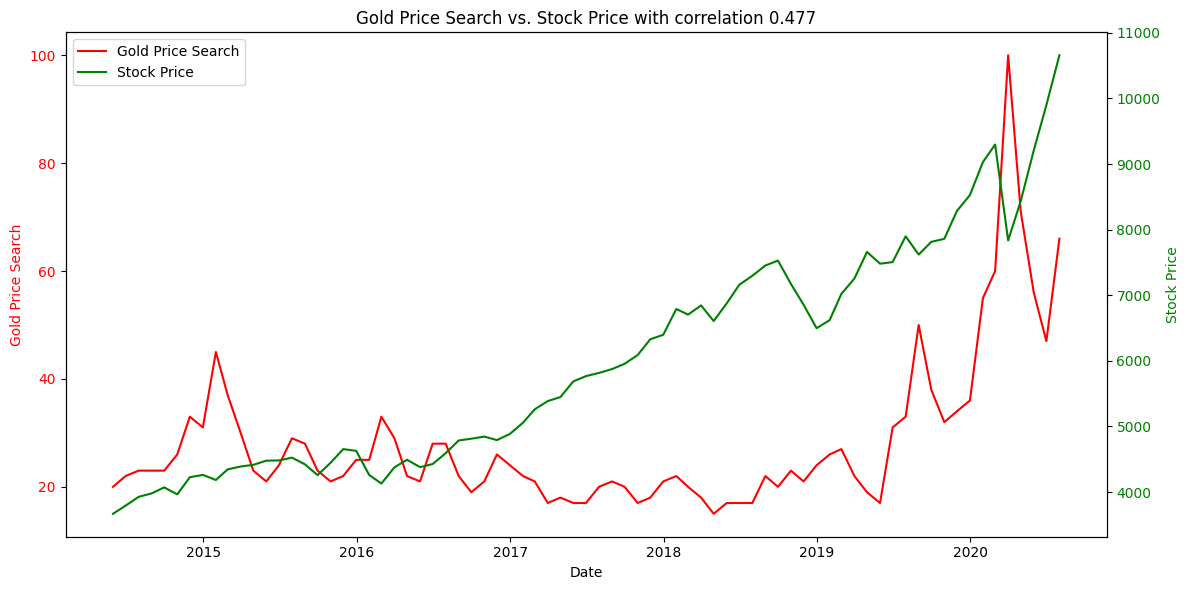

In [ ]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Create a second y-axis for stock price
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['Close'], color='green', label='Stock Price')
ax2.set_ylabel('Stock Price', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Plot search trend on left y-axis
ax1.plot(merged_df['Date'], merged_df['Search'], color='red', label='Gold Price Search')
ax1.set_ylabel('Gold Price Search', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Set x-axis label and title
ax1.set_xlabel('Date')
plt.title(f"Gold Price Search vs. Stock Price with correlation {np.corrcoef(merged_df['Close'].values,merged_df['Search'].values)[0,1].round(3) }")

# Show legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


Inference:

The moderate correlation between Nasdaq close and Google searches for "gold price" implies that while stock market performance does impact not only on public interest in gold, other factors likely play a significant role as well.

# Takeaways from EDA

- Considering the data from 1975 onwards since till 1975 data is stagnant and not convey more information.

- Differencing (d) as 1 since the trending is in linear form ( evident from DFT ), seasonality is yearly.

- Seasonality in additive in nature and Trend in multiplicative in nature.

- The `Price` series has some trend component ( evident from DFT ). So this is treated by differencing.

- Positive correlation with `Gold Price` word search and Nasdaq stock price with gold price.

- `Gold Price` and Nasdaq stock price can be added as exogenos variable  while model building.


Using all these takeaways let's move to model building notebook file.